<a href="https://colab.research.google.com/github/jberardini2/Data-Visualization/blob/main/Copy_of_Module_3_Homework_Multivariate_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multivariate exploratory analysis of S&P 500 stocks by sector



This assignment will have you expand on the previous assignment. Here, you will perform a multivariate exploratory and diagnostic analysis of the S&P 500 stocks by sector. The objectives are to visualize statistical relationships and perform automatic diagnostic analysis with PCA. This will allow us to identify which factors, stocks and sectors might warrant additional exploration particularly when we look at modeling for regression and classification later on. 

In [1]:
%load_ext google.colab.data_table

In [2]:
import pandas as pd
import numpy as np
import pandas_datareader as pdr
from datetime import datetime



* In the code below, we webscrape the SP500 table. This table contains the following information which you will use for the assignment:
  * Symbol
  * Security which is the company name
  * GICS Sector

You will need to use the symbols to query the stock prices using the pandas datareader package. The documentation for the package can be found here:
* [pandas_datareader Remote Data Access](https://pydata.github.io/pandas-datareader/stable/remote_data.html). 
* [RIP Tutorial Datareader Basic Example (Yahoo Finance)](https://riptutorial.com/pandas/example/6232/datareader-basic-example--yahoo-finance-)

Run the following code to load the data.



In [3]:
sp_data = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
sp_table = sp_data[0]
sp_table

,Symbol,Security,SEC filings,GICS Sector,GICS Sub-Industry,Headquarters Location,Date first added,CIK,Founded
0,MMM,3M,reports,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1976-08-09,66740,1902
1,AOS,A. O. Smith,reports,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",1964-03-31,1800,1888
3,ABBV,AbbVie,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ABMD,Abiomed,reports,Health Care,Health Care Equipment,"Danvers, Massachusetts",2018-05-31,815094,1981
...,...,...,...,...,...,...,...,...,...
498,YUM,Yum! Brands,reports,Consumer Discretionary,Restaurants,"Louisville, Kentucky",1997-10-06,1041061,1997
499,ZBRA,Zebra Technologies,reports,Information Technology,Electronic Equipment & Instruments,"Lincolnshire, Illinois",2019-12-23,877212,1969
500,ZBH,Zimmer Biomet,reports,Health Care,Health Care Equipment,"Warsaw, Indiana",2001-08-07,1136869,1927
501,ZION,Zions Bancorporation,reports,Financials,Regional Banks,"Salt Lake City, Utah",2001-06-22,109380,1873


## Question 1: Scatterplot Matrices

One of the first steps in multivariate analysis is to look at correlations.

**Create a scatterplot matrix of monthly log return correlations between each sector:** 
* Use the sector index ticker symbols to fetch the sector prices. The sector tickers are provided below.  
* Compute the log returns. 
* Plot the scatterplot matrix showing the pairwise relationships between log returns for each sector. Apply the appropriate transformations prior to plotting. 
* Parameterize the plot to allow for date range filters

The sectors corresponds to the GICS sector classifications for the SP500 companies in the table above. Depending on the date ranges you specify, the relationship between returns can often approach near perfect correlation. Such instances occur when there are financial crises or global pandemics as all the sectors tend to drop in unison. Try moving the date ranges to the first month of Covid-19 or to the first year of the global financial crisis and observe how correlation changes.


In [4]:
%pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
import yfinance as yf

In [6]:
# Ticker symbols you will need
market_ticker = "SPY"

sector_tickers = [ "XLE", #energy 
             "XLB",  #materials
             "XLI", #industrials
             "XLY", #discretionary
             "XLP", #staples
             "XLV", #health care
             "XLF", #financials
             "XLK", #information tech
             "XLC", #telecommunications
             "XLU", #utilities
             "XLRE" #Real estate
             ]


In [7]:
start_date = '2009-01-01' #@param {type:"date"}
end_date = '2009-12-31' #@param {type:"date"}
print (start_date)
print (end_date)

2009-01-01
2009-12-31


In [8]:
sector_price_data = yf.download(sector_tickers, start=start_date, end=end_date)['Adj Close']

[*********************100%***********************]  11 of 11 completed

2 Failed downloads:
- XLRE: Data doesn't exist for startDate = 1230768000, endDate = 1262217600
- XLC: Data doesn't exist for startDate = 1230768000, endDate = 1262217600


## Question 1 Answer:

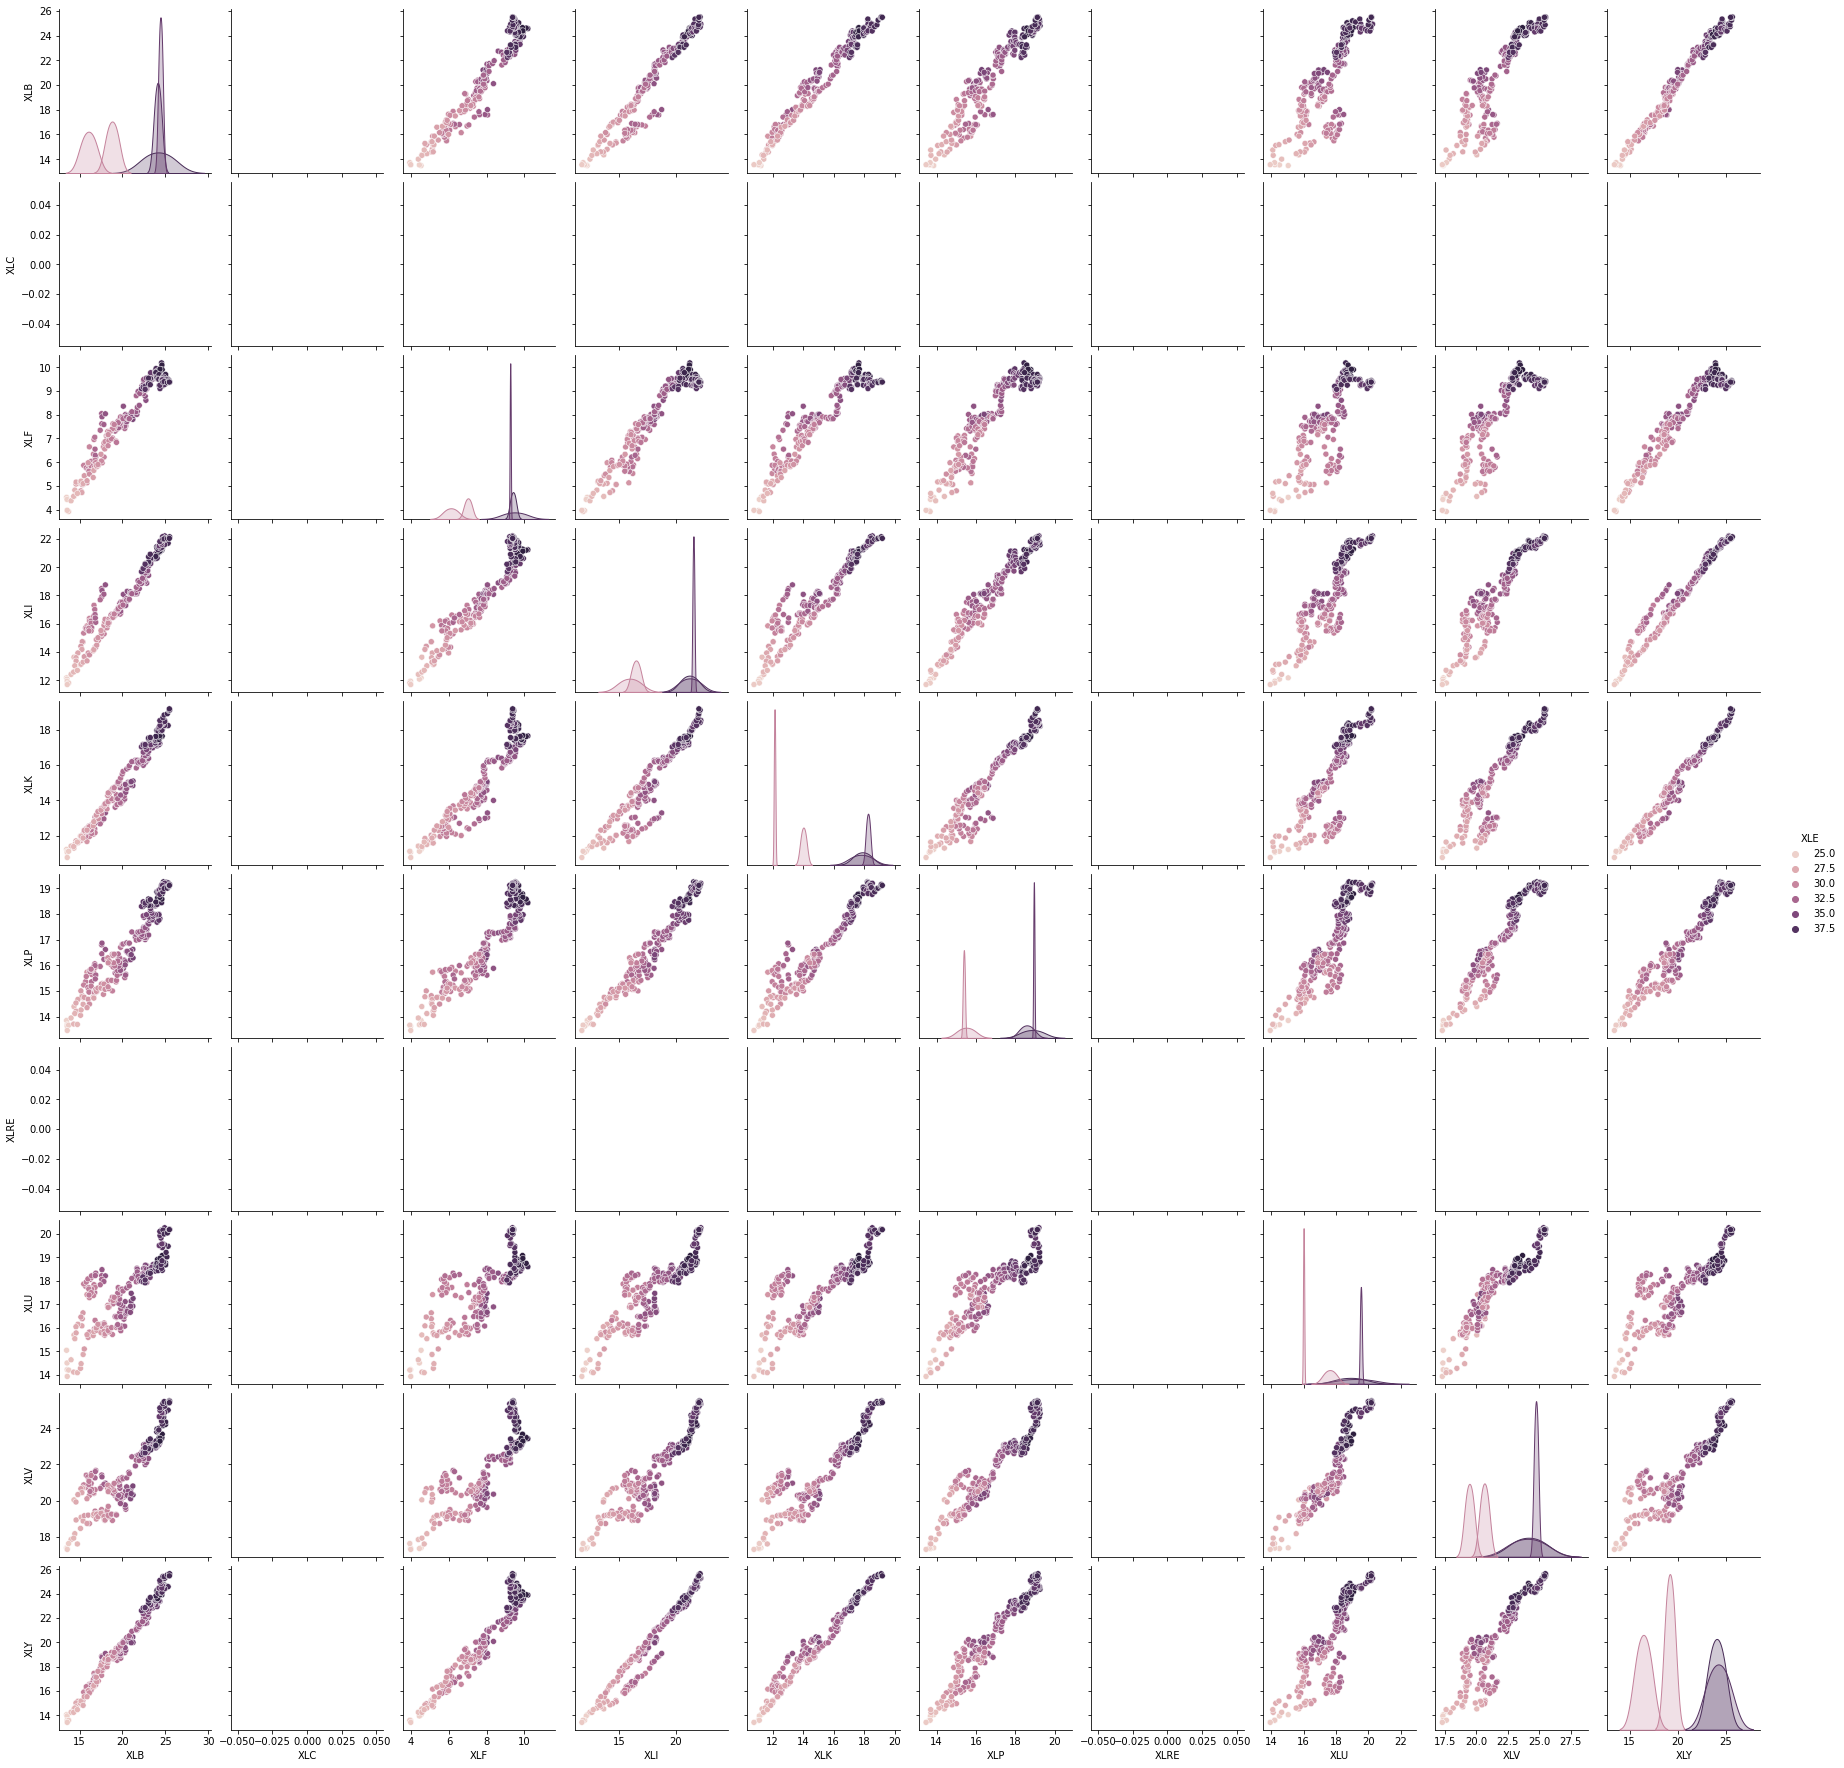

In [9]:
## Plot the scatterplot matrix between all the sectors with each other
## Your code here
import seaborn as sns

sns.pairplot(sector_price_data, hue="XLE")




In [10]:

sector_price_data = sector_price_data.fillna(0)
sector_price_data

,XLB,XLC,XLE,XLF,XLI,XLK,XLP,XLRE,XLU,XLV,XLY
Date,,,,,,,,,,,
2009-01-02,17.578529,0.0,32.844662,8.044740,18.490873,13.037392,16.795151,0.0,18.215137,21.412342,18.848398
2009-01-05,17.615822,0.0,33.617477,7.911293,18.346178,12.996621,16.864525,0.0,18.472639,21.309589,18.765182
2009-01-06,18.011093,0.0,33.984238,8.038384,18.749807,13.298297,16.614780,0.0,18.209007,20.961817,19.081406
2009-01-07,17.593437,0.0,32.543392,7.618993,17.912088,12.874320,16.448284,0.0,18.061863,20.772116,18.324142
2009-01-08,17.839556,0.0,32.962555,7.587220,18.087242,12.964006,16.233232,0.0,17.969900,20.890675,18.432320
...,...,...,...,...,...,...,...,...,...,...,...
2009-12-23,25.248714,0.0,38.449089,9.353243,22.039509,18.905409,19.002214,0.0,20.029062,25.396467,25.562235
2009-12-24,25.446753,0.0,38.629509,9.437682,22.125671,19.079542,19.073700,0.0,20.176476,25.396467,25.579182
2009-12-28,25.469601,0.0,38.696327,9.405202,22.086506,19.137590,19.109446,0.0,20.189301,25.525623,25.562235


In [11]:
## Step 1: Convert the sector_price_data prices to monthly log returns

# .loc - Accesses a group of rows and columns with the list.
filtered_data = sector_price_data.loc[start_date:end_date] 

monthly_returns = filtered_data.resample('M').ffill().pct_change() # .reasample - method for frequency conversion and resampling of time series. The 'M' is the frequency.
                                                                   # The 'M' Samples percentage change for each month.
                                                                   # .ffill - Forward fill the values by pct_change.
log_monthly_returns = np.log(1+monthly_returns) # convert to log returns.  np.log - computes the natural logarithm for the data frame values.

monthly_returns



,XLB,XLC,XLE,XLF,XLI,XLK,XLP,XLRE,XLU,XLV,XLY
Date,,,,,,,,,,,
2009-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-02-28,-0.080247,NaN,-0.123402,-0.177489,-0.170306,-0.038147,-0.080812,NaN,-0.125259,-0.123904,-0.090767
2009-03-31,0.153595,NaN,0.037643,0.170838,0.088173,0.111810,0.042484,NaN,0.019024,0.060058,0.126976
2009-04-30,0.155786,NaN,0.078192,0.217935,0.180684,0.104354,0.042654,NaN,0.011742,-0.001240,0.185242
2009-05-31,0.058434,NaN,0.128876,0.139794,0.033547,0.023188,0.050909,NaN,0.035590,0.068239,-0.007299
2009-06-30,-0.045372,NaN,-0.065489,-0.017856,-0.017042,0.036397,0.001989,NaN,0.053716,0.023701,0.002534
2009-07-31,0.128682,NaN,0.053486,0.088703,0.087432,0.081823,0.066551,NaN,0.037648,0.059293,0.094887
2009-08-31,0.023695,NaN,0.010865,0.129900,0.047738,0.016243,0.012235,NaN,0.010020,0.026911,0.035220
2009-09-30,0.042217,NaN,0.058424,0.019477,0.058338,0.046324,0.033110,NaN,0.013779,0.006152,0.053488


In [12]:
## Step 2: Create a scatterplot matrix
import plotly.express as px
fig = px.scatter_matrix(log_monthly_returns, dimensions= sector_tickers)
fig.update_traces(diagonal_visible=False)

## Question 2: 

* Create a scatterplot between the S&P500 (ticker SPY) monthly log returns and the sector monthly log returns. 
* The sector to be plotted against the S&P 500 should be selectable via a dropdown menu. 
* The starting and ending dates should have a date selector as well. 
* On the same plot, plot the estimated linear regression line

## Question 2 Answer:

## Principal Components Analysis

The overall market index returns are really just a combination of its underlying individual stock returns. The S&P 500 index is the market capitalization weighted performance of its constituent stocks. While the analysis in this assignment and the previous assignment have focused at the sector level, we really would like to go one level deeper and understand how individual stock performance contributed to overall market variance. 



Principal components analysis (PCA) is a classical dimensionality reduction method used in feature selection for large datasets. (We assume you have covered PCA in another class so the following exercises should be a review walkthrough.) In our case, we would like estimate the contribution of variance to the overall market returns by each individual stock. This will allow us to quickly determine the performance attribution of the SP500 by individual stocks. Once we have the individual stocks, we can join the results back to the SP500 table above to understand which sectors and stocks within those sectors lead to the biggest gains and declines over various periods.

The following questions walk you through the analysis.


### Data preparation

The following code:
* Fetches the adjusted close price of each ticker in the SP500 table.
* Calculates the daily log return

Run the code below to prepare the data. (Note: the data retrieval takes a long time.)

In [13]:
%load_ext google.colab.data_table
%pip install yfinance

The google.colab.data_table extension is already loaded. To reload it, use:
  %reload_ext google.colab.data_table
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [14]:
## Step 1. Pull an array of tickers from sp_table
import pandas as pd

sp_data = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
sp_table = sp_data[0]
sp_table
our_ticker_list = sp_table.Symbol
our_ticker_list = [s.replace('\n', '') for s in our_ticker_list]

In [15]:
our_ticker_list

['MMM',
 'AOS',
 'ABT',
 'ABBV',
 'ABMD',
 'ACN',
 'ATVI',
 'ADM',
 'ADBE',
 'ADP',
 'AAP',
 'AES',
 'AFL',
 'A',
 'APD',
 'AKAM',
 'ALK',
 'ALB',
 'ARE',
 'ALGN',
 'ALLE',
 'LNT',
 'ALL',
 'GOOGL',
 'GOOG',
 'MO',
 'AMZN',
 'AMCR',
 'AMD',
 'AEE',
 'AAL',
 'AEP',
 'AXP',
 'AIG',
 'AMT',
 'AWK',
 'AMP',
 'ABC',
 'AME',
 'AMGN',
 'APH',
 'ADI',
 'ANSS',
 'AON',
 'APA',
 'AAPL',
 'AMAT',
 'APTV',
 'ANET',
 'AJG',
 'AIZ',
 'T',
 'ATO',
 'ADSK',
 'AZO',
 'AVB',
 'AVY',
 'BKR',
 'BALL',
 'BAC',
 'BBWI',
 'BAX',
 'BDX',
 'WRB',
 'BRK.B',
 'BBY',
 'BIO',
 'TECH',
 'BIIB',
 'BLK',
 'BK',
 'BA',
 'BKNG',
 'BWA',
 'BXP',
 'BSX',
 'BMY',
 'AVGO',
 'BR',
 'BRO',
 'BF.B',
 'CHRW',
 'CDNS',
 'CZR',
 'CPT',
 'CPB',
 'COF',
 'CAH',
 'KMX',
 'CCL',
 'CARR',
 'CTLT',
 'CAT',
 'CBOE',
 'CBRE',
 'CDW',
 'CE',
 'CNC',
 'CNP',
 'CDAY',
 'CF',
 'CRL',
 'SCHW',
 'CHTR',
 'CVX',
 'CMG',
 'CB',
 'CHD',
 'CI',
 'CINF',
 'CTAS',
 'CSCO',
 'C',
 'CFG',
 'CTXS',
 'CLX',
 'CME',
 'CMS',
 'KO',
 'CTSH',
 'CL',
 'CMCS

In [16]:
stock_price_data = yf.download(our_ticker_list, start_date, end_date)['Adj Close']

[*********************100%***********************]  503 of 503 completed

65 Failed downloads:
- FLT: Data doesn't exist for startDate = 1230768000, endDate = 1262217600
- VICI: Data doesn't exist for startDate = 1230768000, endDate = 1262217600
- SYF: Data doesn't exist for startDate = 1230768000, endDate = 1262217600
- CZR: Data doesn't exist for startDate = 1230768000, endDate = 1262217600
- CBOE: Data doesn't exist for startDate = 1230768000, endDate = 1262217600
- CARR: Data doesn't exist for startDate = 1230768000, endDate = 1262217600
- GNRC: Data doesn't exist for startDate = 1230768000, endDate = 1262217600
- OGN: Data doesn't exist for startDate = 1230768000, endDate = 1262217600
- DOW: Data doesn't exist for startDate = 1230768000, endDate = 1262217600
- CTLT: Data doesn't exist for startDate = 1230768000, endDate = 1262217600
- WRK: Data doesn't exist for startDate = 1230768000, endDate = 1262217600
- FBHS: Data doesn't exist for startDate = 1230768000, endDate = 1262217600

In [17]:
# ## Step 2. Now compute the log returns of the entire dataframe in one call
log_returns = stock_price_data.apply(np.log).diff(1) 



In [18]:
log_returns

,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACN,ADBE,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2008-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-01-05,0.033306,-0.007177,-0.013566,0.041337,NaN,0.018936,-0.020415,-0.017326,0.004445,0.004767,...,0.097952,-0.009600,-0.000123,-0.033535,NaN,0.026824,-0.020809,-0.013886,-0.027166,NaN
2009-01-06,0.076785,0.084006,0.001484,-0.016631,NaN,-0.003869,-0.053269,-0.033221,-0.012496,0.046048,...,0.055415,-0.012946,-0.016427,-0.027004,NaN,-0.001827,0.018412,0.024763,0.033148,NaN
2009-01-07,0.005501,0.002205,-0.040538,-0.021846,NaN,-0.005554,-0.031472,-0.005514,0.011313,0.000413,...,-0.157382,-0.010368,-0.025861,0.002915,NaN,-0.036311,-0.032942,0.000940,-0.107793,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2009-12-23,0.003968,0.007767,-0.002415,0.008647,NaN,0.000380,0.032224,-0.000555,0.009494,-0.011041,...,0.010053,0.003745,-0.004531,0.010178,NaN,0.009651,0.010543,0.009936,-0.022955,NaN
2009-12-24,0.000990,0.039816,0.000242,0.033763,NaN,0.000760,0.003392,0.001109,0.002903,0.006478,...,-0.009885,0.009303,0.005843,-0.006500,NaN,-0.000565,0.003324,0.007738,-0.001549,NaN
2009-12-28,0.002305,-0.069259,-0.003874,0.012219,NaN,0.002654,-0.007932,0.006993,0.011053,0.000538,...,-0.008454,-0.006969,0.006099,0.005091,NaN,-0.006238,0.001161,-0.015893,-0.010913,NaN


In [19]:
## Step 3. Take care of missing values
# Feel free to perform additional data cleansing. The following code is very basic.
log_returns = log_returns.fillna(0)

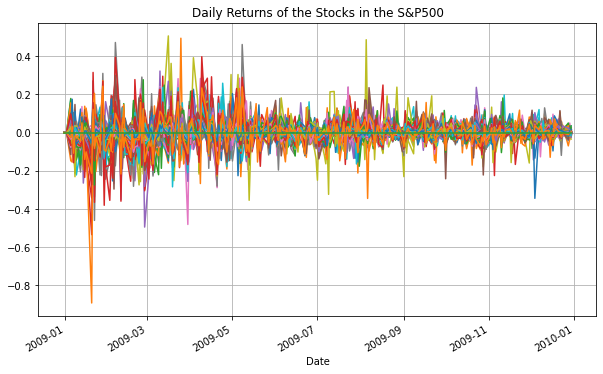

In [20]:
## If everything executed correctly, you should now be able to plot the daily log returns as follows: 
log_returns.plot(legend=0, figsize=(10,6), grid=True, title='Daily Returns of the Stocks in the S&P500')


### PCA

Using the cleansed data set of daily log returns, we can now compute the PCA decomposition.


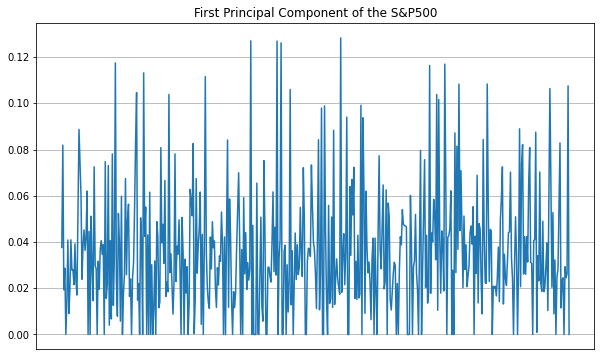

In [21]:
from sklearn.decomposition import PCA

pca = PCA(1).fit(log_returns)
pc1 = pd.Series(index=log_returns.columns, data=pca.components_[0])

# Lets plot the first principal component calculated
pc1.plot(figsize=(10,6), xticks=[], grid=True, title='First Principal Component of the S&P500')



The above graph isn't very useful but we now have the principal components breakdown of the entire stock market by stock returns. You can see how much of the variance we have captured by looking at the cumulative returns determined by PCA's weightings from just the first principal component. 

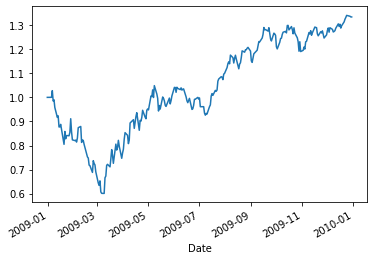

In [22]:
weights = abs(pc1)/sum(abs(pc1))
cum_returns = (weights*log_returns).sum(1)
cum_returns.cumsum().apply(np.exp).plot()


If we plot the first principal components against the SP500 index, we should see similarities in the resulting line graph. 


#### Question 3: PCA Variance Explained

If PCA worked as expected, then the calculated returns from PCA should match up to the actual returns. Essentially, PCA should be extracting the underlying elements of the data that contribute most to the variability of the dataset as a whole. These are called the factor loadings and can be used for meta analysis of large datasets.

To check that PCA performed adequately:

* **Plot the cumulative S&P 500 returns starting from the beginning of 2020 up to today's date for ticker SPY which is the S&P 500 index itself.**
* **Plot on the same graph, the cumulative returns calculated above from PCA for the same date range. `cum_returns.cumsum().apply(np.exp)` would be the applicable code.**

Hint: they should look similar but not exactly identical

The following code shows you how to compute and plot the cumulative return for SPY using matplotlib. **Use a different plotting library in your solution.** 

In [23]:
cum_returns

Date
2008-12-31    0.000000
2009-01-02    0.000000
2009-01-05    0.000152
2009-01-06    0.027371
2009-01-07   -0.042516
                ...   
2009-12-23    0.005544
2009-12-24    0.006390
2009-12-28   -0.002686
2009-12-29   -0.002143
2009-12-30   -0.000017
Length: 252, dtype: float64

#### Question 3 Answer:

In [24]:
# Plot the cumulative S&P 500 returns starting from the beginning of 2020 up to today's date for ticker SPY which is the S&P 500 index itself.
spy_index = yf.download(market_ticker, start=start_date, end=end_date)['Adj Close']

import plotly.io as pio
pio.templates.default = "plotly_white"

import plotly.express as px
import plotly.graph_objects as go

single_line_chart = px.line(spy_index, title="S&P 500 or SPY")
single_line_chart.show()



[*********************100%***********************]  1 of 1 completed


In [25]:
from pandas.core.tools.datetimes import to_datetime
from bokeh.plotting import figure, show
from bokeh.models import ColumnDataSource
from bokeh.io import output_notebook
output_notebook()

import pandas as pd
from datetime import datetime
dframe = pd.DataFrame(spy_index)
# create a ColumnDataSource by passing the dict
source = ColumnDataSource(data=dframe)
dframe


,Adj Close
Date,
2009-01-02,71.532043
2009-01-05,71.447342
2009-01-06,71.924469
2009-01-07,69.769859
2009-01-08,70.054581
...,...
2009-12-23,88.138908
2009-12-24,88.556190
2009-12-28,88.745132


In [26]:

# create a plot using the ColumnDataSource's two columns
#bok = figure()
bok = figure(title="S&P 500 Performance", x_axis_label="Date",  x_axis_type="datetime", y_axis_label="Change",sizing_mode="stretch_width")

#bok.vbar(x="Date", top="Adj Close", legend_label="Rate", width=0.5, bottom=0, color="red")

bok.line(x='Date', y='Adj Close', source=source, legend_label="legend label") 
bok.circle(x='Date', y='Adj Close', source=source, legend_label="legend label",fill_color="white", size=5)  

# change appearance of legend text
bok.legend.label_text_font = "times"
bok.legend.label_text_font_style = "italic"
bok.legend.label_text_color = "white"

# change border and background of legend
bok.legend.border_line_width = 3
bok.legend.border_line_color = "white"
bok.legend.border_line_alpha = 0.8
bok.legend.background_fill_color = "white"
bok.legend.background_fill_alpha = 0.2

# add a title to your legend
bok.legend.title = "Sector Index"

from bokeh.io import curdoc
curdoc().theme = 'night_sky'
                               
show(bok)


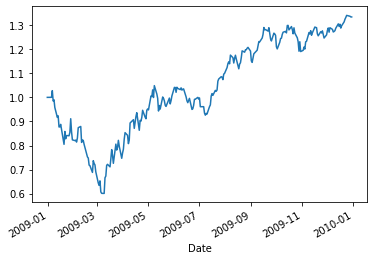

In [27]:
# Plot on the same graph, the cumulative returns calculated above from PCA for the same date range. cum_returns.cumsum().apply(np.exp) would be the applicable code.
cum_returns.cumsum().apply(np.exp).plot()

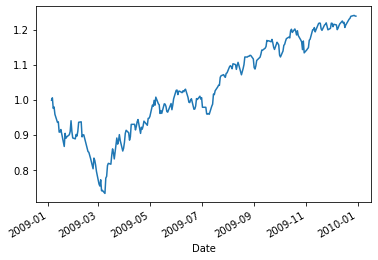

In [28]:
#code shown as reference only! Use a different plotting library and build up the intermediate calcs appropriately
spy_index.apply(np.log).diff(1).dropna().cumsum().apply(np.exp).plot()

#### Question 4:

PCA is often used to show separation in classifications due to variances in certain attributes. The common example used in most courses is estimating plant species based on petal width, sepal length, etc. See [Plotly's documentation](https://plotly.com/python/pca-visualization/) for an example using the Iris dataset. 


The following code attempts to see if the returns distributions separate by industry. During different financial crises, one hypothesis might be that susceptiable industries will show similar behavior and perhaps decline faster than the other industries. These stocks should cluster together in behavior.


The code below calculates the total variance explained by PCA. 

*   **Create a 3D graph of the first three principal components**
*   **Map one of the aesthetics to the GICS sector of the stock**
*   **On hover, show the stock and sector of the datapoint**





#### Question 4 Answer:

In [29]:
from sklearn.decomposition import PCA

X = log_returns.transpose()
pca = PCA(n_components=3)
components = pca.fit_transform(X)
components

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['Timestamp']. An error will be raised in 1.2.



array([[-0.00825292, -0.0931681 ,  0.03904834],
       [ 0.35896427, -0.20668696,  0.17970322],
       [-0.13201533, -0.00517522, -0.06638416],
       ...,
       [-0.07705169, -0.01420882, -0.01431173],
       [ 0.64867093,  0.31278755,  0.0705405 ],
       [-0.26134391,  0.07956352, -0.00389344]])

In [30]:
import plotly.express as px

total_var = pca.explained_variance_ratio_.sum() * 100


In [31]:
total_var = pca.explained_variance_ratio_.sum() * 100
total_var

36.896961112199364

In [32]:

#color=log_returns[''],
# labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}
fig = px.scatter_3d(components, x=0, y=1, z=2,  title=f'Total Explained Variance: {total_var:.2f}%')
fig.show()

In [33]:
pd

<module 'pandas' from '/usr/local/lib/python3.7/dist-packages/pandas/__init__.py'>

In [34]:
# Map one of the aesthetics to the GICS sector of the stock


# Create a dataframe to add more info like Sector
# PCA plotting points PC1, PC2 and PC3
pca_components = pd.DataFrame(data=components, columns=["PC1", "PC2", "PC3"])
# Convert column names (stock symbols) into a list of symbols.
pca_components["Symbol"] = log_returns.columns.to_list()
pca_components = pca_components.merge(sp_table, how="inner", on="Symbol")


In [35]:
# On hover, show the stock and sector of the datapoint
## Step 2: Create a scatterplot matrix
import plotly.express as px
fig = px.scatter_matrix(log_monthly_returns, dimensions= sector_tickers)
fig.update_traces(diagonal_visible=False)

In [36]:
import plotly.express as px
# Calculate the total variance explained by PCA (separation in classifications)
total_var = pca.explained_variance_ratio_.sum() * 100

fig = px.scatter_3d(
pca_components, x="PC1", y="PC2", z="PC3", color = "GICS Sector",
hover_data = ["Symbol", "Security"])

fig.update_traces()



Note: The 3D scatter may not show any clear separation by industry. Stock performance is not just a function of the industry it is in, but rather a function of its cash flow and operating performance. So, it makes sense that there may be no clear clustering or groupings. You can play with the date range of the data to see if the groupings by industry begin to converge.



#### Question 5: 

Another way we can utilize the PCA calculation is to look at the weightings from PCA to rank the performance of individual stocks without *any* knowledge of the company fundamentals or financial history.

For the date range starting from the beginning of 2020 to 2021, **take the top 10 largest and top ten smallest PCA weights for the first principal component and create 2 horizontal bar plots:**

Use these to create 2 horizontal bar plots with sortings by weight. 
Take a moment to think about what this principal component tells you about the economic environment around 2020.


#### Question 5 Answer:

In [37]:
# Question 5 bar plot code here

#### Question 6:

The bar plots above give an indication about what companies fared well or fared poorly during Covid-19 (given the date range of the computation). We are now interested in what industries performed well or poorly. 

* **Create a bar chart showing the average first principal component PCA weight by sector**

#### Question 6 Answer:

In [38]:
# Question 6 code here

## Assignment comments
What you have just created is an interactive notebook that lets anyone view stock market returns by stock, sector, and date as:
* scatterplot matrices showing aggregate relationships
* PCA decomposition showing attribution
* barplot rankings by sector impact

With this notebook, you can now explore relationships between sectors and their constituent stocks through time to understand how global events impacts multiple variables at once in a visual framework. This multivariate descriptive and exploratory visualization is a typical analytical workflow when developing models for prediction or classification. 

